In [161]:
%matplotlib inline

In [163]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from myknn import KNN

## 1. implement KNN class

In [164]:
knn=KNN(5)

## 2.Create a train dataset for nemo pixels and background pixels. Like 🟠orange and ⚪white, add ⚫black for Nemo's body to get better results.

In [ ]:
nemo= cv2.imread('input/nemo.jpg')
nemo=cv2.resize(nemo,(0,0),fx=0.25,fy=0.25)
nemo_hsv = cv2.cvtColor(nemo,cv2.COLOR_BGR2HSV)
nemo_rgb = cv2.cvtColor(nemo,cv2.COLOR_BGR2RGB)
pixels_list_hsv=nemo_hsv.reshape(-1,3)


light_orange=(1,90,200)
dark_orange=(18,255,255)

mask_orange=cv2.inRange(nemo_hsv,light_orange,dark_orange)

light_white=(0,0,190)
dark_white=(145,60,255)

mask_white=cv2.inRange(nemo_hsv,light_white,dark_white)

light_black=(0,0,0)
dark_black=(255,250,5)

mask_black=cv2.inRange(nemo_hsv,light_black,dark_black)
final_mask=mask_black+mask_white+mask_orange
plt.imshow(final_mask,cmap='gray')
plt.show()

x_train= pixels_list_hsv / 255
y_train=final_mask.reshape(-1,)

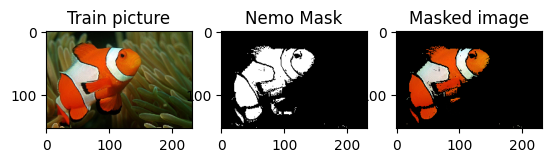

In [173]:
fig,axes=plt.subplots(nrows=1,ncols=3)
ax1,ax2,ax3=axes.flatten()

ax1.imshow(nemo_rgb,cmap='gray')
ax1.set_title('Train picture')

ax2.imshow(final_mask,cmap='gray')
ax2.set_title('Nemo Mask')

final_result=cv2.bitwise_and(nemo_rgb,nemo_rgb,mask=final_mask)
ax3.imshow(final_result)
ax3.set_title('Masked image')

plt.show()

## 3.Fit your KNN on the train dataset.

In [174]:
knn.fit(x_train,y_train)

## 4. Predict nemo pixels and background pixels for new test images.

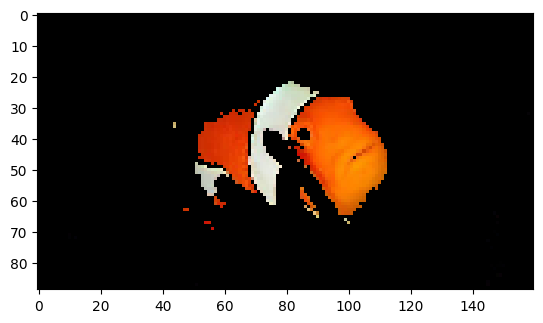

In [176]:
abji_nemo=cv2.imread('input/dash_nemo.jpg')
abji_nemo=cv2.resize(abji_nemo,(0,0),fx=0.25,fy=0.25)
abji_nemo_hsv=cv2.cvtColor(abji_nemo,cv2.COLOR_BGR2HSV)
x_test=abji_nemo_hsv.reshape(-1,3)/255
y_pred=knn.predict(x_test)

image_output=np.array(y_pred).reshape(abji_nemo.shape[:2])
image_output=image_output.astype('uint8')

final_result=cv2.bitwise_and(abji_nemo,abji_nemo,mask=image_output)
final_result=cv2.cvtColor(final_result,cv2.COLOR_BGR2RGB)
plt.imshow(final_result)
plt.show()

## 5. Implement class FindingNemo for automate above steps.

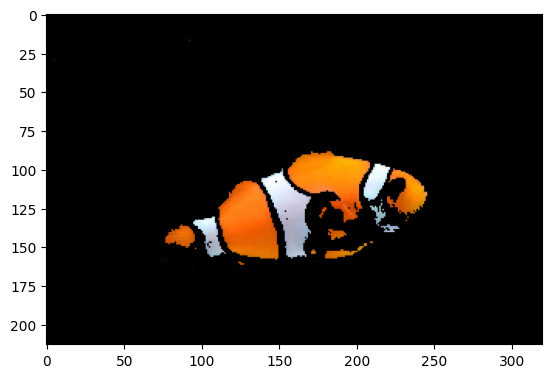

In [177]:
from findingnemo import FindingNemo

findnemo=FindingNemo(5,"input/abji_nemo.jpg")
image_output=findnemo.make_predict()
plt.imshow(image_output,cmap='gray')
plt.show()